# 앙상블 학습
동일한 데이터셋에 대해서 가장 좋은 모델 1개를 쓰는 것보다 **여러 종류의 예측기를 통합하는 것**이 더 좋음  
예를 들면 학습 데이터셋으로부터 무작위로 각기 다른 서브셋을 만들어 일련의 결정 트리 분류기를 학습시킴. 그리고 모든 개별 트리의 예측을 구하고 가장 많은 선택을 받은 클래스를 예측으로 삼음. 이것을 **랜덤 포레스트** 라고 함.  
> 프로젝트의 마지막에는 흔히 앙상블 방법을 이용하여 이미 만든 여러 예측기를 연결하여 더 좋은 예측을 만듬.  
**앙상블 방법은 예측기가 가능한 한 서로 독립적일 때 최고의 성능을 발휘함  
다른 종류의 오차를 만들도록 각기 다른 알고리즘을 사용할 것**
  
- 배깅
- 부스팅
- 스태킹  
을 알아보겠음

## 1. 투표 기반 분류기
**직접 투표**  
- 예측의 경우 가장 많이 선택된 클래스를 선택하는 것  
  
**간접 투표**
- 예측의 경우 개별 분류기의 예측(확률)을 평균 내어 가장 높은 확률을 가진 클래스를 선택하는 것

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [2]:
voting_clf = VotingClassifier(
estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
voting="hard")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

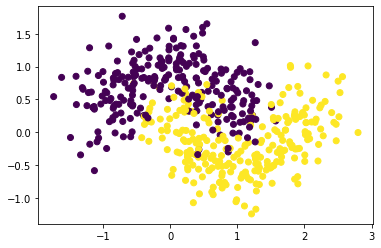

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y)

**make_moons** 데이터셋에 대하여 **논리회귀, 랜덤포레스트, svm** 모델을 앙상블해보겠음

In [9]:
voting_clf.fit(x_train, y_train)
log_clf.fit(x_train, y_train)
rnd_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)

SVC()

In [10]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(clf.__class__.__name__, acc)

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [16]:
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
voting="soft")

voting_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)

SVC(probability=True)

In [17]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(clf.__class__.__name__, acc)

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.92


직접투표와 간접투표방식을 모두 적용해봄  
확실히 앙상블을 적용한 결과가 더 좋음  
간접투표를 사용하려면 **모든 분류기가 클래스 확률을 추정할 수 있어야함**. 그래서 svc의 probability매개변수를 조정함  
>**일반적으로 간접투표방식이 직접투표보다 더 좋음**